### Project 3: Build a timeseries model for forecasting number of customers of a particular store

In [1]:
# !pip install streamlit==1.24.0

  One of the leading retail stores in the US, ABC, would like to predict the customers and demand accurately. There are certain events and holidays which impact sales on each day. There are customers data available for 51 stores of ABC. The business is facing a challenge due to unforeseen demands and runs out of stock sometimes, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like promotions, state and school holidays conditions.
ABC runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. Part of the challenge presented by this competition is modelling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical data for 51 stores located in different regions are availab
le.
The dataset contains 51 stores’ customers data along with other details like day of the week, store id, promotion and holidays details  from Jan 2014 to2016.


### Data Dictionary


**Date** : Date 

**Store**:Store id

**Day of Week**: Day of the week (encoded):  
1: Sunday 2: Monday… 7: Saturday 

**Customers**: Number of customers on a given day 

**Open** : An indicator for whether the store is open:  
0: Close; 1: Open 

**Promotion**: An Indicator whether a store is running a promotion on given day. 
0: No Promotion; 1: Promotion 

**State Holiday**: Indicates a state holiday; Normally all stores, with few exceptions, are closed on state holidays.  
0: No state holiday; ‘a’, ’b, ’c’: different types of holidays 

**School Holiday**: An indicator if the (Store, Date) was affected by the closure of public schools 

#### Holiday Events
 - **Super Bowl:** Feb month 
 - **Labour Day:** Sept month
 - **Thanksgiving:** Nov month
 - **Christmas:** December month

**Initial Guidelines:**
1. Ensure to follow to Use Id’s provided by UNext for naming file as conventions.
2. Create GitHub account and submit the GitHub link.


### Software Engineering aspect:  

Utilize software engineering aspects while building Machine learning model using modular programming principles to organize your code into reusable functions or classes to enhance readability, maintainability, and collaboration.

### General Instructions

- The cells in the Jupyter notebook can be executed any number of times for testing the solution
- Refrain from modifying the boilerplate code as it may lead to unexpected behavior
- The solution is to be written between the comments `# code starts here` and `# code ends here`
- On completing all the questions, the assessment is to be submitted on moodle for evaluation
- Before submitting the assessment, there should be `no error` while executing the notebook. If there are any error causing code, please comment it.
- The kernel of the Jupyter notebook is to be set as `Python 3 (ipykernel)` if not set already
- Include imports as necessary
- For each of the task, `Note` section will provide you hints to solve the problem.
- Do not use `PRINT` statement inside the `Except` Block. Please use `return` statement only within the except block

#### **Utilize software engineering aspects while building Machine learning model using modular programming principles to organize your code into reusable functions or classes to enhance readability, maintainability, and collaboration.**

### Loading required libraries and packages 

Import various libraries and modules used in data analysis, machine learning, and visualization tasks in Python such as `pandas`, `numpy`, `sklearn`, `matplotlib`, `datetime` , `timeit`, `seaborn`, `statsmodels`,`statsmodels.tsa.arima.model` `statsmodels.tsa.stattools`,`statsmodels.api` , `sklearn.model_selection`, `sklearn.linear_model`, `sklearn.metrics`, `sklearn.preprocessing`. There are 2 ways to import the libraries and modules:

- import numpy as np
- from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import itertools
import warnings
import pickle

###  Task 1 : Load the dataset and perform preliminary EDA (Exploratory Data Analysis) with key observations and insights-  (weightage - 25 marks)

#### T1.1: Load the dataset making ‘Date’ as time stamp and index using try and except blocks.                   (weightage - 2 marks) (AE)

##### Note: 
- The read_excel method in Pandas allows you to read Excel files and convert them into a DataFrame, which is a two-dimensional tabular data structure in Pandas.
- Add parse_dates = True and index_col = 'Date' while loading the df since we are using timeseries data
- Do not use PRINT statement inside the Except Block. Please use `return` statement only
- `Store50` variable is defined to store the dataframe
- The statement `return Store50` should return the dataframe.

In [3]:
def load_the_dataset(dataset_location):
    # code starts here
    Store50 = None
    try:
        #load data set
        Store50 = pd.read_excel(dataset_location, parse_dates = True, index_col = 'Date')
        return Store50
    except :
        return "File not found. Please check the file"
    # code ends here

In [4]:
# store the result of the dataset
dataset_location = "store50.xlsx"
Store50=load_the_dataset(dataset_location)
Store50.head()

,Store,Day Of Week,Customers,Open,Promotion,State Holiday,School Holiday
Date,,,,,,,
2016-01-01,1036.0,4.0,0.0,0.0,0.0,0,1.0
2016-01-01,1027.0,4.0,0.0,0.0,0.0,0,1.0
2016-01-01,1004.0,4.0,0.0,0.0,0.0,0,1.0
2016-01-01,1014.0,4.0,0.0,0.0,0.0,0,1.0
2016-01-02,1044.0,7.0,0.0,0.0,0.0,0,0.0


In [5]:
store_1041 = Store50.loc[Store50["Store"] == 1041]

In [6]:
store1041_customers = store_1041["Customers"].sort_index()

In [7]:
adf_test_result = adfuller(store1041_customers)
print(f"p-value: {adf_test_result[1]}")
if adf_test_result[1] <= 0.05:
    print('Data is stationary')
else:
    print('Data is not stationary')

p-value: 9.89782835812637e-09
Data is stationary


In [8]:
#resample the data to weekly 
store_1041_weekly = store1041_customers.resample('W').sum()

In [9]:
adf_test_result = adfuller(store_1041_weekly)
print(f"p-value: {adf_test_result[1]}")
if adf_test_result[1] <= 0.05:
    print('Data is stationary')
else:
    print('Data is not stationary')

p-value: 0.061938421992233754
Data is not stationary


In [10]:
#check missing values
Store50.isna().sum()

Store             1530
Day Of Week       1530
Customers         1530
Open              1530
Promotion         1530
State Holiday     1530
School Holiday    1530
dtype: int64

#### T1.2:  Find the number of unique stores                     (weightage - 2 marks) (AE)

##### Note: 

- The function `unique_store` should retrieve the number of unique values of the `Store` column from the DataFrame Store50.
- Extract the `Store` column from the DataFrame **Store50** and then apply the unique() method to it and store it in the defined variable `uniq`.
- The unique() method returns an array of unique values present in the 'Store' column. 
- The statement `return len(uniq)` returns an integer of number of unique store values are there in the 'Store' column.

In [11]:
## List the number of unique stores for which we have the data?
def unique_store(Store50):
    # code starts here
    uniq = None
    
    #find the number of stores
    uniq = Store50['Store'].unique()
    
    return len(uniq)
    # code ends here
    

In [12]:
unique_store(Store50)

52

#### T1.3 Find the number of observations for each store?     (weightage - 2 marks) (AE)

##### Note :
- The function `no_obs_store` should return the number of observations for each store stored together in the form of a dictionary
- Retrieve the unique values of the 'Store' column from the DataFrame Store50.
- Extract the 'Store' column from the DataFrame Store50 and then applies the unique() method to it. 
- Iterate over each unique store value using a for loop and get the number of observations and store it in the dictionary `store_counts`
- Example for key value pair **{1036.0: 852}** where 1036.0 is Store value and 852 is the number of observations.


In [13]:
def no_obs_store(Store50):
    # code starts here
    store_counts = {}
    
    #get the unique values of the store column
    unique_stores = Store50['Store'].unique()
    
    # Iterate over each unique store value
    for store in unique_stores:
        
        store_observations = Store50[Store50['Store'] == store]
        
        # Store the len of observations in the dictionary
        store_counts[store] = len(store_observations)

    return store_counts
    # code ends here

In [14]:
no_obs_store(Store50)

{1036.0: 852,
 1027.0: 852,
 1004.0: 852,
 1014.0: 852,
 1044.0: 852,
 1041.0: 852,
 1047.0: 852,
 1012.0: 852,
 1037.0: 668,
 1005.0: 852,
 1011.0: 852,
 1043.0: 852,
 1001.0: 668,
 1048.0: 852,
 1030.0: 852,
 1035.0: 852,
 1013.0: 852,
 1029.0: 852,
 1042.0: 852,
 1017.0: 668,
 1032.0: 852,
 1024.0: 852,
 1006.0: 668,
 1007.0: 852,
 1002.0: 668,
 1019.0: 852,
 1000.0: 668,
 1009.0: 852,
 1023.0: 668,
 1016.0: 852,
 1050.0: 852,
 1031.0: 852,
 1010.0: 852,
 1034.0: 852,
 1039.0: 852,
 1033.0: 852,
 1045.0: 852,
 1015.0: 852,
 1022.0: 852,
 1040.0: 852,
 1046.0: 852,
 1021.0: 852,
 1028.0: 852,
 1008.0: 852,
 1025.0: 668,
 1020.0: 852,
 1038.0: 668,
 1003.0: 852,
 1018.0: 852,
 1026.0: 852,
 1049.0: 852,
 nan: 0}

#### T1.4: Find the list of store ids which are having less number of observations compared to other stores?                                        (weightage - 2 marks) (AE)
##### Note:
- The function `less_obs_stores` should return the list of store ids which are having number of observations less than 852.
- Extract the `Store` column from the DataFrame Store50 and then applies the unique() method to it
- Iterate over each unique store value using a for loop and get the number of observations less than 852 and append it in the list `less_obs_stores_list`.

##### HINT: Highest number of observations is 852, print all stores ids having number of observations less than 852 

In [15]:
def less_obs_stores(Store50):
    # code starts here
    less_obs_stores_list = []
    
    #get the unique values of the store column
    unique_stores = Store50['Store'].unique()
    
    # Iterate over each unique store value
    for store in unique_stores:
        
        store_observations = Store50[Store50['Store'] == store]
        
        # count the observations per each store 
        count_observations = len(store_observations)
        
        if count_observations < 852:
            less_obs_stores_list.append(store)   

    return less_obs_stores_list
    # code ends here

In [16]:
less_obs_stores(Store50)

[1037.0, 1001.0, 1017.0, 1006.0, 1002.0, 1000.0, 1023.0, 1025.0, 1038.0, nan]

#### T1.5: Find the average number of customers for the given store ids:1041, 1044?  (weightage - 4 marks) (AE)

##### Note: 
- The function `avg_cust_store` should return the average number of customers for two specific stores (Store 1044 and Store 1041) within the Store50 DataFrame.
- Sort the data in ascending order, calculate the mean customer count for both stores and store them in the variables mean_1044 and mean_1041 respectively. 
- Use the variable `mean_1044` and `mean_1041` to store the mean values of Store 1044 and Store 1041.


In [17]:
# Here, we are also reversing the data as we need to contiguous data in the ascending order for a Time Series Analysis.
def avg_cust_store(Store50):
    # code starts here
    mean_1041 , mean_1044 = None, None
    
    #sort the data
    sort_Store50 = Store50.sort_index(ascending = True)
    
    #filter the data for each store id
    store_1041 = sort_Store50[sort_Store50['Store'] == 1041]
    store_1044 = sort_Store50[sort_Store50['Store'] == 1044]
    
    #compute the mean and round to nearest integer
    mean_1041 = round(store_1041['Customers'].mean())
    mean_1044 = round(store_1044['Customers'].mean())

    return mean_1044 , mean_1041
    # code ends here

In [18]:
avg_cust_store(Store50)

(474, 700)

#### T1.6: Draw the time series plot (using pandas only) on weekly aggregation (by resampling method) of number of customers for the Store ids 1041 & 1044?       (weightage - 4 marks) (ME)

##### Note:(regarding the function time_series_plot)
- The function `time_series_plot` should return a dataframe `df` where it stores the data of number of customers per each date availble in the dataset for Store id 1044 and Store id 1041.
- Sort the data in ascending order for store 1044 and store 1041 from the `Store50` DataFrame .
- Combines this filtered data into a new DataFrame named `df` with both the columns with names `Store_1041` and `Store_1044` and structure it with columns for each store's `Customers` data.
- Format of the dataframe returned

|            | Store\_1041 | Store\_1044 |
|------------|-------------|-------------|
|Date        |             |             |
| 2014-01-01 | 0.0         | 0.0         |



In [19]:
def time_series_plot(Store50):
    # code starts here
    df = None
    
    #sort the data
    sort_Store50 = Store50.sort_index(ascending = True)
    
    #filter the data for each store id
    store_1041_cust_info = sort_Store50[sort_Store50['Store'] == 1041]["Customers"]
    store_1044_cust_info = sort_Store50[sort_Store50['Store'] == 1044]["Customers"]
    
    #create a dataframe
    df = pd.DataFrame({'Store_1041': store_1041_cust_info, 'Store_1044': store_1044_cust_info})

    return df
    # code ends here

In [20]:
df = time_series_plot(Store50)

##### Note: The 'Customers' variable is our desired Time Series. So let us plot it to understand how the series looks like. This is a daily series.

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

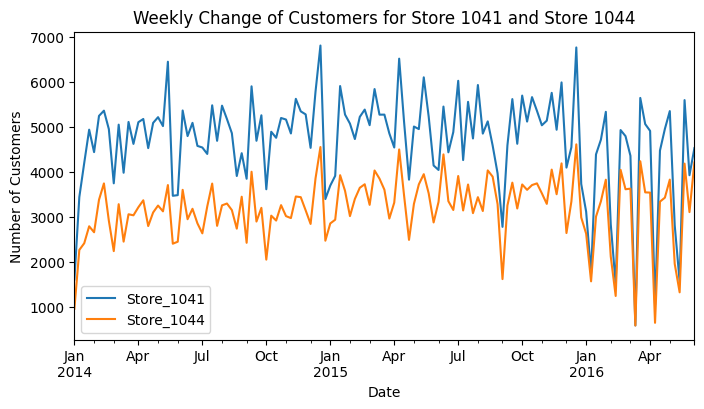

In [22]:
## Resample the data into a weekly time series to understand how the number of customers change weekly.
df.resample('W').sum().plot(figsize=(8, 4))
plt.title("Weekly Change of Customers for Store 1041 and Store 1044")
plt.xlabel("Date")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

#### T1.7: Draw the time series plot (using pandas only) on monthly aggregation (by resampling method) of number of customers for the Store ids 1041 & 1044?   (weightage - 2 marks) (ME)

##### Note: Use the dataframe `df` combined in the above cell to plot the time series plot.

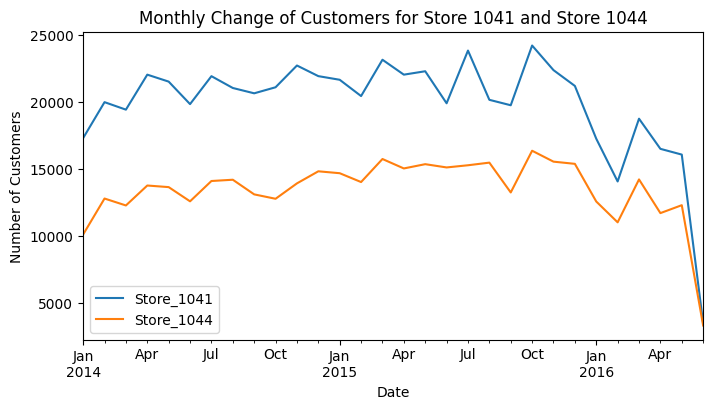

In [23]:
## Resample the data into a monthly time series to understand how the number of the customers change monthy?
df.resample('M').sum().plot(figsize=(8, 4))
plt.title("Monthly Change of Customers for Store 1041 and Store 1044")
plt.xlabel("Date")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

#### T1.8: Which store id dominates(out of 1041 & 1044) in both weekly and monthly customers aggregation?      (weightage - 2 marks) (AE)  

##### Note: 
- There are two functions, first function `store_id_max_weekly` for weekly customers aggregation and second function `store_id_max_monthly` for monthly customers aggregation
##### HINT - Get the aggregration based on average and return the store ID in the format given below. The output should be in this format `Store_####`

In [24]:
def store_id_max_weekly(df):
    # code starts here
    max_id = None
    
    #resample the data to weekly and take aggregation
    weekly_agg = df.resample('W').sum()
    
    # use the previous dataframe
    if weekly_agg['Store_1041'].mean() > weekly_agg['Store_1044'].mean():
        max_id = "Store_1041"
    else:
        max_id = "Store_1044"
    
    return max_id
    # code ends here

In [25]:
store_id_max_weekly(df)

'Store_1041'

In [26]:
def store_id_max_monthly(df):
    # code starts here
    max_id =  None
    
    #resample the data to monthly and take aggregation
    monthly_agg = df.resample('M').sum()
    
    # use the previous dataframe
    if monthly_agg['Store_1041'].mean() > monthly_agg['Store_1044'].mean():
        max_id = "Store_1041"
    else:
        max_id = "Store_1044"

    return max_id
    # code ends here

In [27]:
store_id_max_monthly(df)

'Store_1041'

#### T1.9: Save the dataset (weekly aggregated data related to number of customers for store id 1041 & 1044 in csv file as ‘weekly_1041.csv’ and ‘weekly_1044.csv’ ) in your GitHub repository for model building process. (This task is for maintaining the version control of datasets)                  (weightage - 1 mark) (ME)

#### Refer to the Github document from Lumen to create the repository and steps to commit 
#### Add your Github repository link below 

https://github.com/Niranjankumar-c/TimeSeries_Analysis

##### Note: 
- The function `weekly_1041` will return the weekly sum for store id 1041.
- Use the method `resample()` to calculate the weekly sum for the dataframe `df` and drop the Store_1044 to get the dataframe for weekly 1041.Use axis=1, inplace=True
- Store the dataframe in the variable `df_weekly_1041`


In [28]:
# weekly sum for store_1044
def weekly_1041(df):
    df_weekly_1041 =  None
    
    #code starts here
    
    df_weekly_1041 = df.resample('W').sum().drop('Store_1044', axis = 1)

    # code ends here
    return df_weekly_1041

In [29]:
df_weekly_1041 = weekly_1041(df)

##### Note:
- The function `weekly_1044` will return the weekly sum for store id 1041.
- Use the method `resample()` to calculate the weekly sum for the dataframe `df` and drop the Store_1041 to get the dataframe for weekly 1044.Use axis=1, inplace=True
- Store the dataframe in the variable `df_weekly_1044`

In [30]:
def weekly_1044(df):
    df_weekly_1044 = None
    #code starts here
    
    df_weekly_1044 = df.resample('W').sum().drop('Store_1041', axis = 1)
    
    # code ends here
    return df_weekly_1044

In [31]:
df_weekly_1044 = weekly_1044(df)

##### Save them into CSV files

In [27]:
# save the into csv file
df_weekly_1041.to_csv('weekly_1041.csv')
df_weekly_1044.to_csv('weekly_1044.csv')

## Task 2: Building forecasting models and metrics evaluation. (weightage - 50 Marks) 

#### T2.1: Use the weekly_1041 and weekly_1044 data and Conduct stationarity test(ADF) for both weekly aggregated data(1041 &1044) ?  (weightage - 10 Marks) (AE and ME)
Are they both exhibit stationary? State your results of the Augmented Dicky Fuller(ADF) test

Print your output in the given format :

**Data is stationary       
Data is not stationary**

##### Note:
- Function `adf_test` should be designed for analyzing time series data using the Augmented Dickey-Fuller (ADF) test, a statistical test used to determine if a time series is stationary or not. 
- Utilize rolling statistics and the Augmented Dickey-Fuller (ADF) test to analyze time series data(rolling mean and standard deviation with a window size of 7).
- Plot the original time series along with rolling statistics, and perform the ADF test to check if the value is less than or equal to `0.05` then return `data is stationary` or else return the `data is non-stationary` 


**Checking for stationarity of data using ADF test function:**

In [35]:
## Defning a function
def adf_test(timeseries):
    # code starts here
    
    
    #compute the rolling mean and standard deviation with the window of 7
    rolling_mean = timeseries.rolling(window=7).mean()
    rolling_std = timeseries.rolling(window=7).std()
    
    # Comparing the original time series data along with rolling mean and std
    plt.figure(figsize=(7, 4))
    plt.plot(timeseries, color='blue', label='Original Data')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='green', label='Rolling Std')
    plt.title('Original Time Series Data with Rolling Statistics')
    plt.xlabel("Date")
    plt.xticks(rotation = 45)
    plt.legend()
    plt.show()
    
    # Perform the Augmented Dickey-Fuller (ADF) test
    adf_result = adfuller(timeseries)
    
    # Extract and print the ADF test results
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    
#     print("Critical values")
#     for key, value in adf_result[4].items():
#         temp_key = key
#         temp_value = value
#         print(f"\t{key}:{value}")
    
    
    # Determine if the data is stationary or non-stationary based on the p-value
    if p_value <= 0.05:
        return 'Data is stationary'
    else:
        return 'Data is not stationary'

    # code ends here

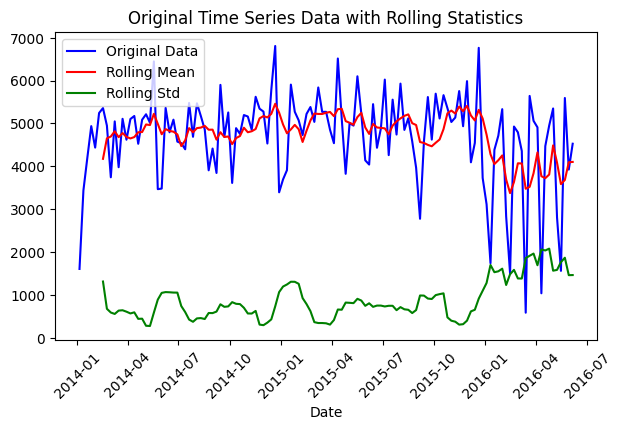

ADF Statistic: -2.774974054807337
p-value: 0.061938421992233754


'Data is not stationary'

In [36]:
#checking stationary for the store 1041 weekly aggregated data
adf_test(df_weekly_1041)

## Analysis
- The Augmented Dickey-Fuller (ADF) test is a statistical test used to check if a time series is stationary, or has a constant mean and variance over time. The null hypothesis of the ADF test is that the time series is non-stationary, meaning it has a unit root. If the p-value of the test is less than a specified significance level (typically 0.05), we reject the null hypothesis and conclude that the time series is stationary.

- The weekly aggregated store data for store 1041 is not stationary. This is because the p-value is greater than the significance level of 0.05, indicating that we fail to reject the null hypothesis that the time series has a unit root, and therefore, the time series is non-stationary.

- The ADF Statistic is more than the critical value (5%), which implies that the series is not stationary.

In [37]:
#differencing the data to make it stationary
df_weekly_1041_diff1 = df_weekly_1041["Store_1041"].diff(periods = 1).fillna(0)

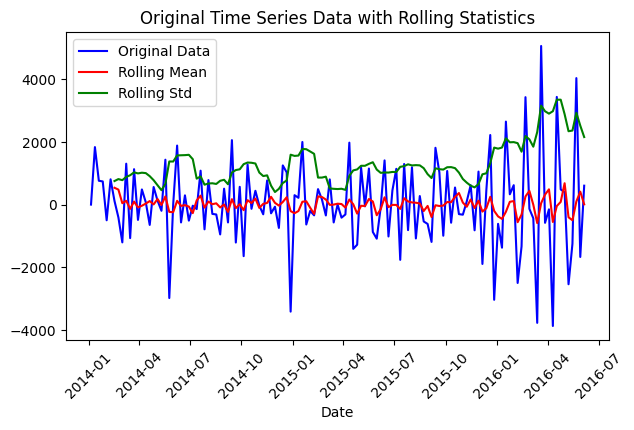

ADF Statistic: -4.937478305649636
p-value: 2.9466165776589507e-05


'Data is stationary'

In [38]:
#checking stationary for the first differenced weekly aggregated data of store 1041
adf_test(df_weekly_1041_diff1)

##### Series is stationary and hence no more need for differentiation.

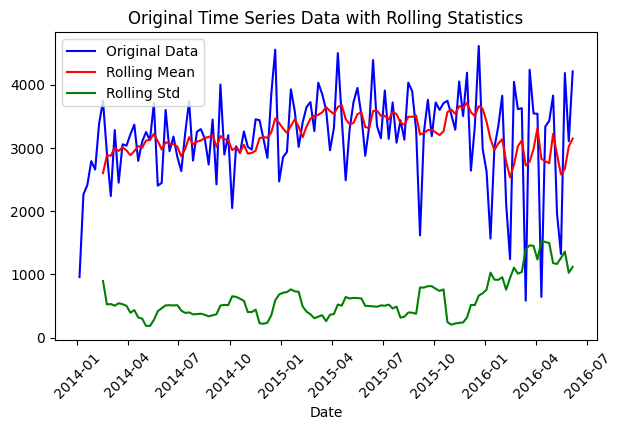

ADF Statistic: -3.569083375593806
p-value: 0.0063803503350419915


'Data is stationary'

In [39]:
#checking stationary for the store 1044
adf_test(df_weekly_1044)

##### Series is stationary and hence no need for differentiation.

#### T2.2 :Split the data into train and test (consider  2016 year  for test data)                                   (weightage - 5 Marks) (AE)
##### Perform the split for store 1041 data and store 1044 separately and return the train_1041, test_1041 and train_1044,test_1044

##### Note: 
- The function `train_test_split_1041` should be designed to split the time series data `df_weekly_1041` into training and testing sets. 
- Specifically, it should separate the data for the year 2016 to be used as the test set, while all other years are used for training. 
- Similarly, the function `train_test_split_1044` should be designed to split the time series data `df_weekly_1044` into training and testing sets. 
- It should also separate the data for the year 2016 to be used as the test set.\
- Use the variable that are declared in the function to store the training data and testing data respectively.

In [40]:
def train_test_split_1041(df_weekly_1041):# Split the data into train and test ( consider year 2016 for test data) 
    train_1041,test_1041 = None, None
    #code starts here
    
    train_1041 = df_weekly_1041[df_weekly_1041.index.year != 2016]
    test_1041 = df_weekly_1041[df_weekly_1041.index.year == 2016]

    # code ends here
    return train_1041,test_1041

In [41]:
train_1041=train_test_split_1041(df_weekly_1041)[0]
test_1041=train_test_split_1041(df_weekly_1041)[1]

In [42]:
def train_test_split_1044(df_weekly_1044):# Split the data into train and test ( consider year 2016 for test data) 
    train_1044,test_1044 = None,None
    # code starts here

    train_1044 = df_weekly_1044[df_weekly_1044.index.year != 2016]
    test_1044 = df_weekly_1044[df_weekly_1044.index.year == 2016]
    
    # code ends here
    return train_1044,test_1044

In [43]:
train_1044=train_test_split_1044(df_weekly_1044)[0]
test_1044=train_test_split_1044(df_weekly_1044)[1]

#### T2.3: Draw the ACF and PACF plot for the above train data for both the stores (1041 and 1044) (weightage - 6 Marks) (ME)
##### Note: Use figsize = (12,8) ,lags = 20 and ax = plt.gca()

<Figure size 1200x800 with 0 Axes>

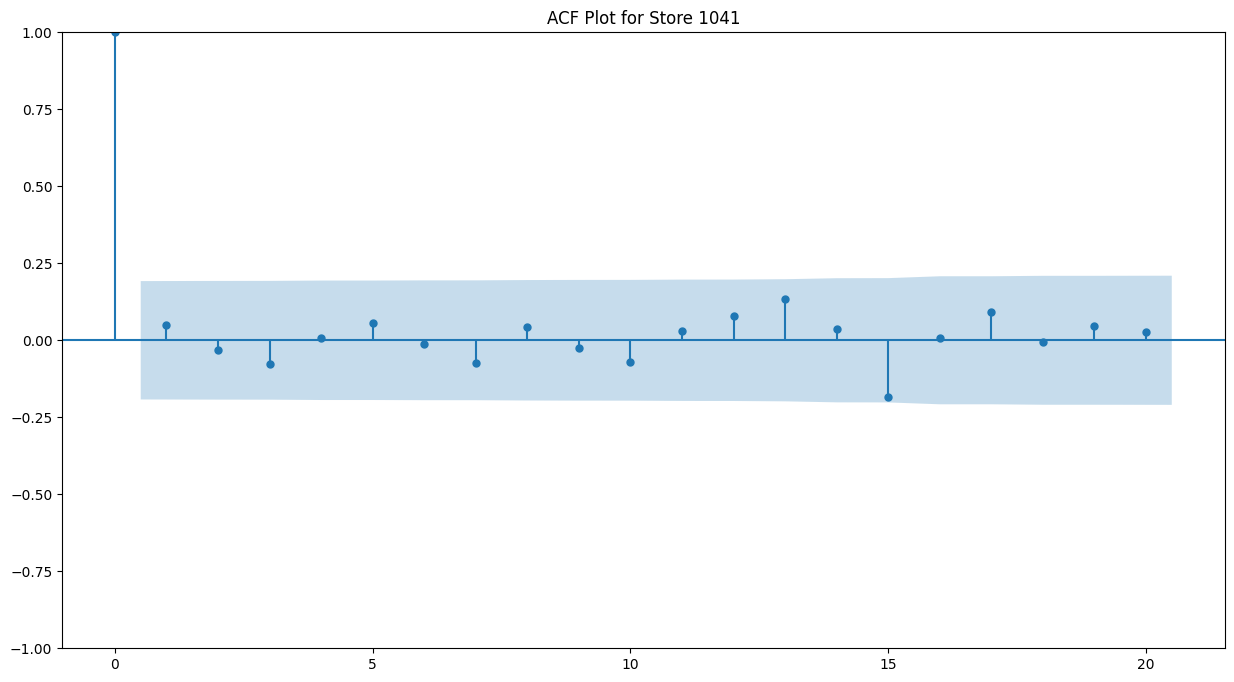

In [44]:
## Auto correlation plot for weekly aggregation data of Store 1041
plt.figure(figsize=(12, 8))
plot_acf(train_1041, lags=20)
plt.title("ACF Plot for Store 1041")
plt.show()

<Figure size 1200x800 with 0 Axes>

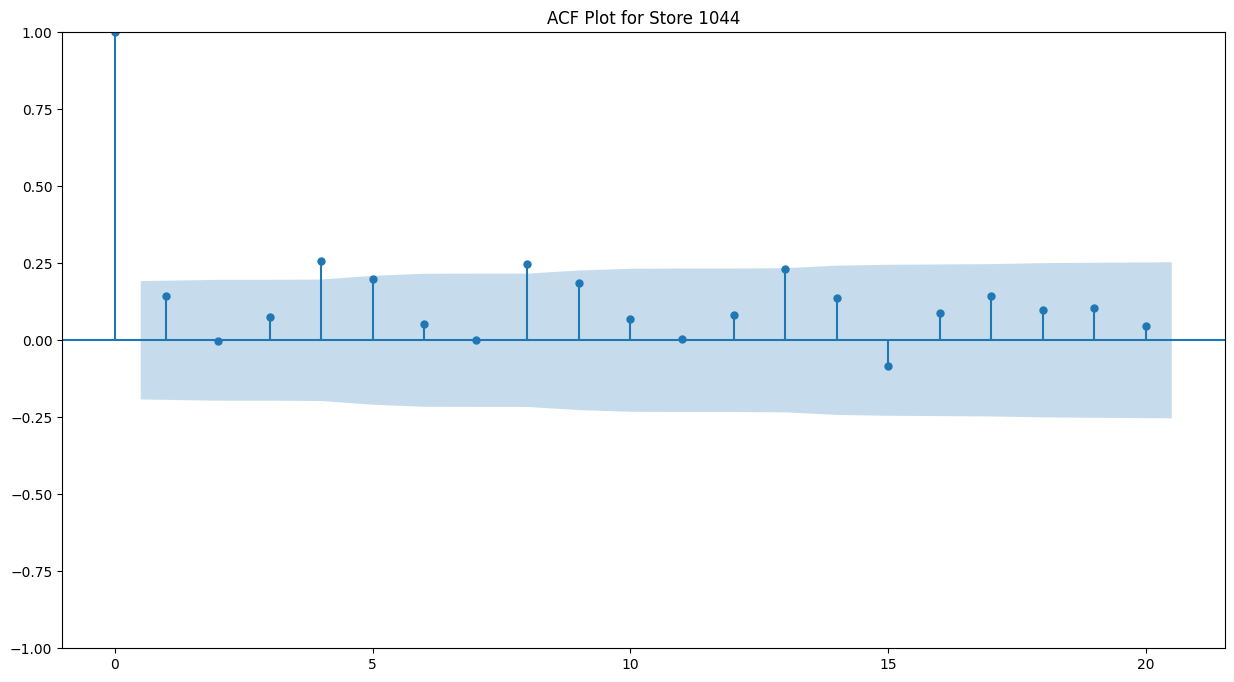

In [45]:
## Auto correlation plot for weekly aggregation data of Store 1044
plt.figure(figsize=(12, 8))
plot_acf(train_1044, lags=20)
plt.title("ACF Plot for Store 1044")
plt.show()

<Figure size 1200x800 with 0 Axes>

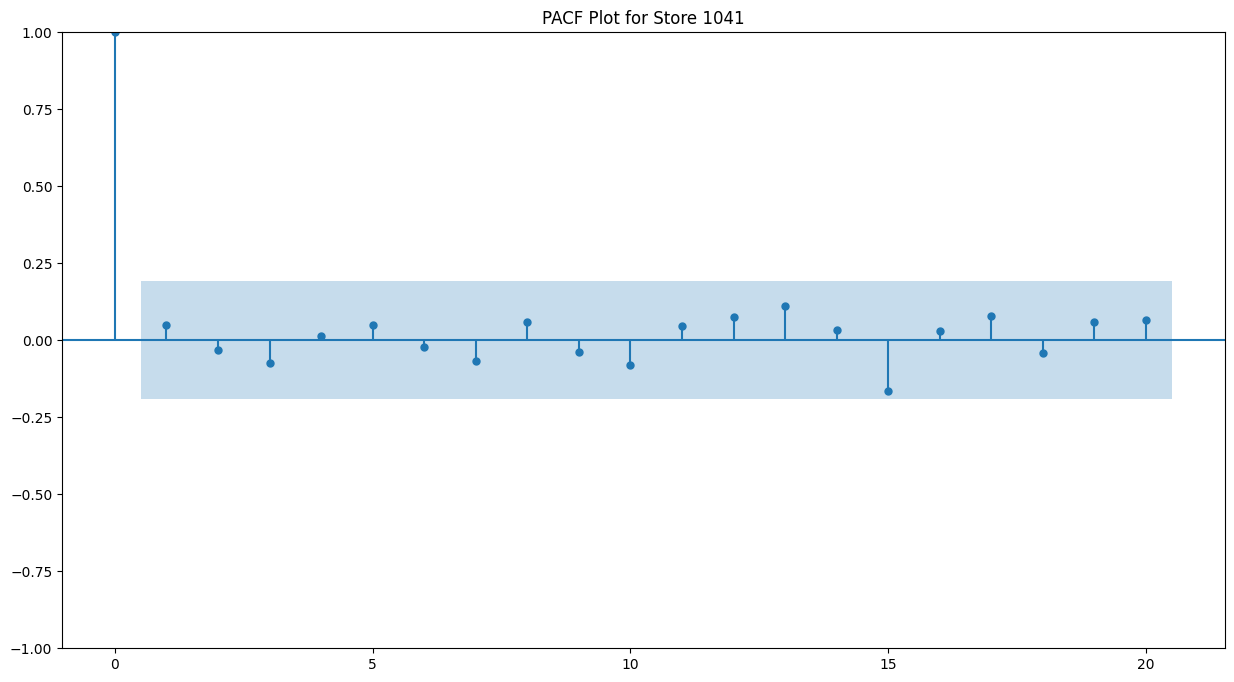

In [46]:
## Partial Auto correlation plot for weekly aggregation data of Store 1041
plt.figure(figsize=(12, 8))
plot_pacf(train_1041, lags=20)
plt.title("PACF Plot for Store 1041")
plt.show()

<Figure size 1200x800 with 0 Axes>

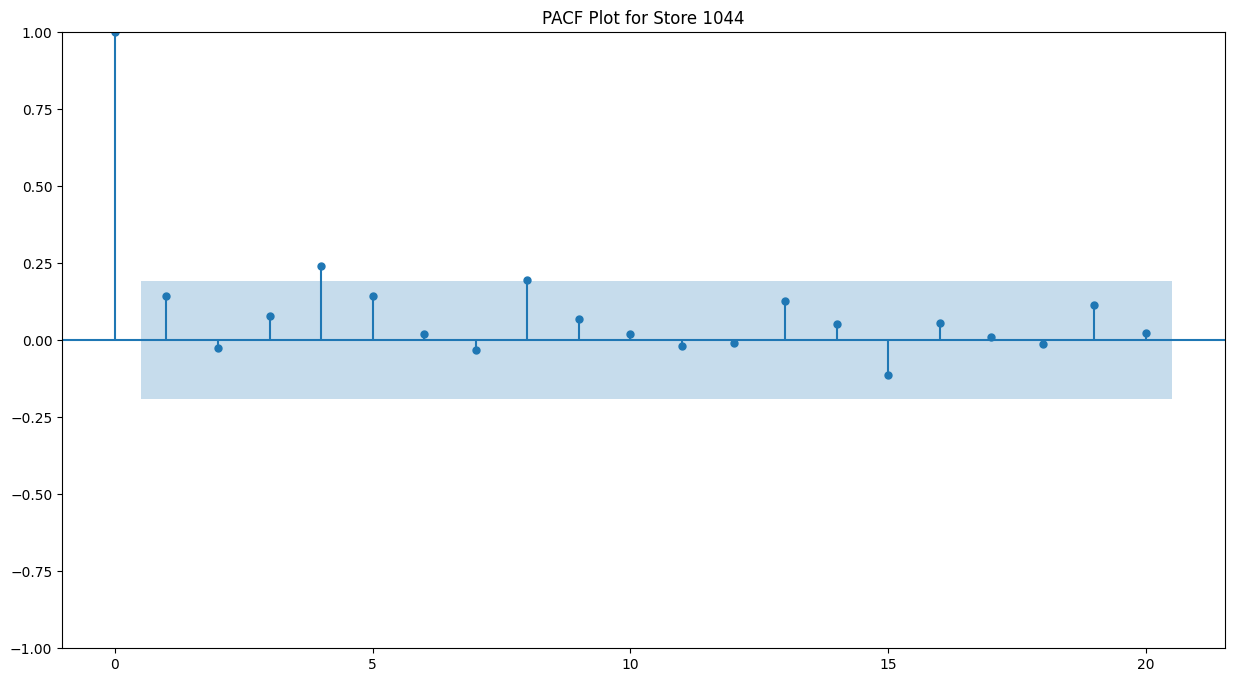

In [47]:
## Partial Auto correlation plot for weekly aggregation data of Store 1044
plt.figure(figsize=(12, 8))
plot_pacf(train_1044, lags=20)
plt.title("PACF Plot for Store 1044")
plt.show()

#### Task 2.4: Find the best p.d q values for ARIMA model based on least AIC values  (weightage - 6 Marks) (ME)

##### Note :ARIMA
 - Set up a grid search for p, d, and q parameters using `itertools.product`
 - Augment parameters with seasonality (e.g., 7 for weekly data).
 - print parameter combinations as below
 - Example - Model: (0, 0, 1)(0, 0, 1, 7)

In [48]:
#set up grid search option

p = range(0, 4)
d = range(1, 2)
q = range(0, 5)

#seaonality parameters
s = [0, 7, 14]
P = D = Q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, s))

##### Note: Create an empty DataFrame (ARIMA_AIC) to store results with columns `param` and `AIC`

### Finding best ARIMA parameters
- Finding thes best pdq

In [49]:
warnings.filterwarnings("ignore")

def find_best_arima_params(train_data):
    """
    Find the best p, d, q values for the ARIMA model based on the least AIC values.
    
    Parameters:
    train_data (DataFrame): Training data for the time series.
    
    Returns:
    tuple: The best p, d, q values for the ARIMA model
    """
    # Define the parameter grids
    p = range(0, 4)
    d = range(1, 2)
    q = range(0, 5)

    pdq = list(itertools.product(p, d, q))
    
    # Create an empty DataFrame to store the results
    ARIMA_AIC = pd.DataFrame(columns=['param','AIC'])
    
    # Fit ARIMA models and calculate AIC values
    for param in pdq:
        try:
            model = ARIMA(train_data, order=param)
            results = model.fit()
            ARIMA_AIC = ARIMA_AIC.append({'param': param, 'AIC': results.aic}, ignore_index=True)
            print(f'ARIMA{param} - AIC: {results.aic}')
        except Exception as e:
            print(e)
            continue
    
    
    # Find the best parameter combination
    best_params = ARIMA_AIC.loc[ARIMA_AIC['AIC'].idxmin()]
    return (best_params['param'])

# Example usage:
# train_1041, test_1041 = train_test_split_1041(df_weekly_1041)
# best_params = find_best_arima_params(train_1041, seasonal_period=7)  # Assuming weekly data
# print(f"Best ARIMA Model: ARIMA{best_params[0]}x{best_params[1]}{best_params[2]}")

In [51]:
best_params = find_best_arima_params(train_1041)  # Assuming weekly data

ARIMA(0, 1, 0) - AIC: 1731.6449238033865
ARIMA(0, 1, 1) - AIC: 1691.3732369106724
ARIMA(0, 1, 2) - AIC: 1692.173018325601
ARIMA(0, 1, 3) - AIC: 1694.2199394338006
ARIMA(0, 1, 4) - AIC: 1695.647202468447
ARIMA(1, 1, 0) - AIC: 1712.6175732533452
ARIMA(1, 1, 1) - AIC: 1692.1653892453903
ARIMA(1, 1, 2) - AIC: 1694.1590108251778
ARIMA(1, 1, 3) - AIC: 1696.0461800609582
ARIMA(1, 1, 4) - AIC: 1695.923657071019
ARIMA(2, 1, 0) - AIC: 1708.3268525174333
ARIMA(2, 1, 1) - AIC: 1696.2521232924364
ARIMA(2, 1, 2) - AIC: 1696.137271673857
ARIMA(2, 1, 3) - AIC: 1690.350369226208
ARIMA(2, 1, 4) - AIC: 1692.6280872978768
ARIMA(3, 1, 0) - AIC: 1704.0475381418414
ARIMA(3, 1, 1) - AIC: 1695.7471640659028
ARIMA(3, 1, 2) - AIC: 1695.936049006605
ARIMA(3, 1, 3) - AIC: 1697.8935838865066
ARIMA(3, 1, 4) - AIC: 1693.9806904398931


In [52]:
best_params

(2, 1, 3)

#### Find SARIMA best parameters
- Find the best SARIMA Parameters, pdq and PDQ

In [55]:
warnings.filterwarnings("ignore")

def find_best_arima_params(train_data, seasonal_period):
    """
    Find the best p, d, q, P, D, Q values for the ARIMA model with seasonality based on the least AIC values.
    
    Parameters:
    train_data (DataFrame): Training data for the time series.
    seasonal_period (int): The number of periods in a season (e.g., 12 for monthly data).
    
    Returns:
    tuple: The best p, d, q, P, D, Q values for the ARIMA model with seasonality.
    """
    # Define the parameter grids
    p = range(0, 4)
    d = range(1, 2)
    q = range(0, 5)

#     P = D = Q = range(0, 2)
    P = range(0, 4)
    D = range(1, 2)
    Q = range(0, 5)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = list(itertools.product(P, D, Q))
    
    # Create an empty DataFrame to store the results
    ARIMA_AIC = pd.DataFrame(columns=['param', 'seasonal_param', 'AIC'])
    
    # Fit ARIMA models with seasonality and calculate AIC values
    for param in pdq:
        for seasonal_param in seasonal_pdq:
            try:
                model = SARIMAX(train_data, order=param, seasonal_order=(*seasonal_param, seasonal_period))
                results = model.fit(disp=False)
                ARIMA_AIC = ARIMA_AIC.append({'param': param, 'seasonal_param': seasonal_param, 'AIC': results.aic}, ignore_index=True)
                print(f'ARIMA{param}x{seasonal_param}{seasonal_period} - AIC: {results.aic}')
            except:
                continue
    
    # Display the results
    print(ARIMA_AIC)
    
    # Find the best parameter combination
    best_params = ARIMA_AIC.loc[ARIMA_AIC['AIC'].idxmin()]
    return (best_params['param'], best_params['seasonal_param'], seasonal_period)

In [ ]:
best_params_seasonal = find_best_arima_params(train_1041, seasonal_period=7)  # Assuming weekly data

ARIMA(0, 1, 0)x(0, 1, 0)7 - AIC: 1688.6295131490212
ARIMA(0, 1, 0)x(0, 1, 1)7 - AIC: 1629.1789050837497
ARIMA(0, 1, 0)x(0, 1, 2)7 - AIC: 1627.123384371891
ARIMA(0, 1, 0)x(0, 1, 3)7 - AIC: 1629.4422115070197
ARIMA(0, 1, 0)x(0, 1, 4)7 - AIC: 1631.033489206527
ARIMA(0, 1, 0)x(1, 1, 0)7 - AIC: 1651.5828014760011
ARIMA(0, 1, 0)x(1, 1, 1)7 - AIC: 1627.2747050837106
ARIMA(0, 1, 0)x(1, 1, 2)7 - AIC: 1629.123235652194
ARIMA(0, 1, 0)x(1, 1, 3)7 - AIC: 1631.122517406598
ARIMA(0, 1, 0)x(1, 1, 4)7 - AIC: 1633.4675111120175
ARIMA(0, 1, 0)x(2, 1, 0)7 - AIC: 1641.7950142425914
ARIMA(0, 1, 0)x(2, 1, 1)7 - AIC: 1629.224776001902
ARIMA(0, 1, 0)x(2, 1, 2)7 - AIC: 1631.2611204553996
ARIMA(0, 1, 0)x(2, 1, 3)7 - AIC: 1632.5146964723558
ARIMA(0, 1, 0)x(2, 1, 4)7 - AIC: 1634.7287056280932
ARIMA(0, 1, 0)x(3, 1, 0)7 - AIC: 1635.9860958576735
ARIMA(0, 1, 0)x(3, 1, 1)7 - AIC: 1630.9375963311568
ARIMA(0, 1, 0)x(3, 1, 2)7 - AIC: 1630.36218794663
ARIMA(0, 1, 0)x(3, 1, 3)7 - AIC: 1635.1139167530118
ARIMA(0, 1, 0)x(3, 

ARIMA(1, 1, 3)x(0, 1, 0)7 - AIC: 1648.3468858343895
ARIMA(1, 1, 3)x(0, 1, 1)7 - AIC: 1600.7986297681307
ARIMA(1, 1, 3)x(0, 1, 2)7 - AIC: 1600.3342127887845
ARIMA(1, 1, 3)x(0, 1, 3)7 - AIC: 1602.1265563135266
ARIMA(1, 1, 3)x(0, 1, 4)7 - AIC: 1601.8156641469132
ARIMA(1, 1, 3)x(1, 1, 0)7 - AIC: 1619.176670477418
ARIMA(1, 1, 3)x(1, 1, 1)7 - AIC: 1600.5085446375565
ARIMA(1, 1, 3)x(1, 1, 2)7 - AIC: 1606.867518666207
ARIMA(1, 1, 3)x(1, 1, 3)7 - AIC: 1608.5181873145584
ARIMA(1, 1, 3)x(1, 1, 4)7 - AIC: 1604.3506489366218
ARIMA(1, 1, 3)x(2, 1, 0)7 - AIC: 1610.3661251533294
ARIMA(1, 1, 3)x(2, 1, 1)7 - AIC: 1602.2922216918396
ARIMA(1, 1, 3)x(2, 1, 2)7 - AIC: 1604.785765010806
ARIMA(1, 1, 3)x(2, 1, 3)7 - AIC: 1628.3819131728112
ARIMA(1, 1, 3)x(2, 1, 4)7 - AIC: 1627.127432131209
ARIMA(1, 1, 3)x(3, 1, 0)7 - AIC: 1608.2869431148665
ARIMA(1, 1, 3)x(3, 1, 1)7 - AIC: 1606.8465478303924
ARIMA(1, 1, 3)x(3, 1, 2)7 - AIC: 1616.6575399433461
ARIMA(1, 1, 3)x(3, 1, 3)7 - AIC: 1622.7423388536342
ARIMA(1, 1, 3)x(

In [ ]:
best_params_seasonal

##### Note :
- Create a loop through parameter combinations:
- Fit ARIMA models using training data.
- Calculate AIC values for each model.
- Store parameter combination and AIC value in ARIMA_AIC.
-  Display or analyze results in ARIMA_AIC.

#### Task 2.5: Build the best ARIMA and SARIMA model based on the best p,d q values for store 1041 and make predictions  (weightage - 10 Marks) (ME)

##### HINTS :
 - Fit the ARIMA and SARIMA model for store 1041 
 - Plot comparing both the model predictions 

##### ARIMA Model

In [ ]:
#fir arima model
arima_model = ARIMA(train_1041, order = (2, 1, 3))
arima_fit = arima_model.fit()

In [ ]:
# Make predictions with ARIMA model
pred_1041 = arima_fit.forecast(steps=len(test_1041))

In [ ]:
pred_1041.values

#### SARIMA model 

In [ ]:
# Fit SARIMA model
sarima_model = SARIMAX(train_1041, order=(0, 1, 1), seasonal_order=(0, 1, 2, 7))
sarima_fit = sarima_model.fit(disp = False)


# Make predictions with SARIMA model
pred_sarima_1041 = sarima_fit.forecast(steps=len(test_1041))

In [ ]:
pred_sarima_1041

##### Plot the test_1041

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(test_1041, label = "1041 Test")
plt.title("Weekly Change of Customers for Test Store 1041")
plt.xlabel("Date")
plt.ylabel("Number of Customers")
plt.show()

In [ ]:
plt.figure(figsize=(10, 4))

# Plotting the predictions from ARIMA model
plt.plot(pred_1041, label='ARIMA Predictions', color='green')

# Plotting the predictions from SARIMA model
plt.plot(pred_sarima_1041, label='SARIMA Predictions', color='red')

plt.title("Weekly Change of Customers based on ARIMA/SARIMA Predictions")
plt.xlabel("Date")
plt.ylabel("Number of Customers")
plt.show()

#### T2.6 : Perform Model evaluation and print various evaluation metrics (MSE, RMSE, MAE, MAPE) (weightage - 6 Marks) (ME) 
##### Note:Prepare the function timeseries_evaluation_metrics_func in a way that it will take inputs for ARIMA Model test_1041['Store_1041'],pred_1041 , and for SARIMA Model test_1041['Store_1041'], pred_sarima_1041 which will print the following values 
 - Mean Squared Error
 - Root Mean Squared Error 
 - Mean Absolute Error 
 - Mean Absolute Percentage Error 

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    # code starts here
    
    """
    Calculate evaluation metrics for time series prediction.

    Parameters:
    y_true : array-like
        Array containing the true values.
    y_pred : array-like
        Array containing the predicted values.
    """
    # Calculate evaluation metrics
    mse = np.mean((y_pred - y_true) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_pred - y_true))
    mape = np.mean(np.abs((y_pred - y_true) / y_true)) * 100
    
    # Print evaluation metrics
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Mean Absolute Error:", mae)
    print("Mean Absolute Percentage Error:", mape)
    # code ends here

**Evaluation metrics for ARIMA model**

In [ ]:
#get the evaluation for arima model predictions
timeseries_evaluation_metrics_func(test_1041['Store_1041'],pred_1041)

**Evaluation metrics for SARIMA model**

In [ ]:
#get the evaluation metrics for the sarima model predictions
timeseries_evaluation_metrics_func(test_1041['Store_1041'], pred_sarima_1041)

#### T2.7 : Save the initial version of ARIMA model as “ARIMA_Model_Storeid” and “SARIMA_Model_Storeid” to a version controlsystem GitHub using git commands for collaboration, tracking and ensuring transparency in model development.  (weightage - 2 Marks) (ME)

- saved to the git hub repo
## https://github.com/Niranjankumar-c/TimeSeries_Analysis

#### T2.8 : Model Explainability - Using Lime/SHAP libraries, explain the prediction of your time series model and give inferences.   (weightage – 5 marks)(ME)

In [ ]:
import lime
import lime.lime_tabular

https://chatgpt.com/c/62fdca8e-b885-476e-85ed-259bebb2e43d

In [ ]:
train_1041

In [ ]:


# # Assuming you have already trained your ARIMA and SARIMA models and stored them in arima_model and sarima_model variables

# # Create Lime explainer
# arima_explainer = lime.lime_tabular.LimeTabularExplainer(training_data, mode="regression")
# sarima_explainer = lime.lime_tabular.LimeTabularExplainer(training_data, mode="regression")

# # Get an instance of test data to explain (assuming test_data contains your test set)
# instance = test_data.iloc[0]

# # Explain ARIMA prediction
# arima_exp = arima_explainer.explain_instance(instance.values, arima_model.predict, num_features=len(instance))

# # Explain SARIMA prediction
# sarima_exp = sarima_explainer.explain_instance(instance.values, sarima_model.predict, num_features=len(instance))

# # Print explanations
# print("ARIMA Explanation:")
# print(arima_exp.as_list())
# print("\nSARIMA Explanation:")
# print(sarima_exp.as_list())


## Task 3: Model Deployment: Deploy the trained model into a production environment, allowing stakeholders to utilize it for real-time forecasting Develop an intuitive user interface to facilitate easy interaction with the model. (weightage – 10 marks) 

#### T3.1 Model deployment step (saving the file as a .t5 model)      (weightage – 2 marks)(ME)

In [ ]:
#Save the models into local directory 

# Save ARIMA model
with open("models/ARIMA_Model_Store1041.t5", "wb") as f:
    pickle.dump(arima_fit, f)

# Save SARIMA model
with open("models/SARIMA_Model_Store1041.t5", "wb") as f:
    pickle.dump(sarima_fit, f)

#### T3.2 Implement the unit test cases and use the saved .t5 model file to create a webapp using flask/streamlit code    (weightage – 8 marks)(ME)

In [ ]:
import unittest
import streamlit as st

## Test Cases - Unittest

In [ ]:
# Function to load ARIMA model
def load_arima_model(file_path):
    try:        
        with open(file_path, "rb") as f:
            arima_model = pickle.load(f)
        return arima_model
    except Exception as e:
        print(e)
        return None

# Function to load SARIMA model
def load_sarima_model(file_path):
    try:        
        with open(file_path, "rb") as f:
            sarima_model = pickle.load(f)
        return sarima_model
    except Exception as e:
        print(e)
        return None

In [ ]:
#load the ARIMA model
arima_model = load_arima_model("models/ARIMA_Model_Store1041.t5")
    
    
#load the SARIMA model
sarima_model = load_arima_model("models/SARIMA_Model_Store1041.t5")

In [ ]:
#arima model loading test case
def test_arima_model_loading(model_path):
    
    # Load ARIMA model
    arima_model = load_arima_model(model_path)

    # Test model loading
    assert arima_model is not None, "ARIMA model loading failed."

In [ ]:
#sarima model loading test case
def test_sarima_model_loading(model_path):
    
    # Load ARIMA model
    sarima_model = load_sarima_model(model_path)

    # Test model loading
    assert sarima_model is not None, "SARIMA model loading failed."

In [ ]:
test_arima_model_loading("models/ARIMA_Model_Store1041.t5")

In [ ]:
test_sarima_model_loading("models/SARIMA_Model_Store1041.t5")

In [ ]:
#create unit test on model predictions
def test_model_predictions(model_object):
    
    # Generate sample test data, number of steps
    test_data = pd.DataFrame(np.random.randn(10, 1), columns=['Value'])
    
    # Test prediction accuracy
    prediction = model_object.forecast(steps=len(test_data))
    assert len(prediction) == len(test_data), "Incorrect number of predictions."
    # Add more assertions as needed

In [ ]:
#arima model test predictions
test_model_predictions(arima_model)

#sarima model test predictions
test_model_predictions(sarima_model)

In [ ]:
#check if there any non zero predictions
def test_arima_non_zero_prediction(model_file):
    
    # Generate sample test data
    test_data = pd.DataFrame(np.random.randn(10, 1), columns=['Value'])

    # Test prediction range
    prediction = model_file.forecast(steps=len(test_data))

    assert not np.any(prediction.values <= 0), "ARIMA prediction values cann't be less than zero."

    
def test_sarima_non_zero_prediction(model_file):
    
    # Generate sample test data
    test_data = pd.DataFrame(np.random.randn(10, 1), columns=['Value'])

    # Test prediction range
    prediction = model_file.forecast(steps=len(test_data))

    assert not np.any(prediction <= 0), "SARIMA prediction values cann't be less than zero."

In [ ]:
#check for any non zero predictions
test_arima_non_zero_prediction(arima_model)

test_sarima_non_zero_prediction(sarima_model)

## Model Deployment - 

### Task 4: Summarize the findings of the analysis and draw conclusions with PPT / PDF. (weightage - 15 marks) (ME)

**Final Submission guidelines:**
- Download the Jupyter notebook in the format of html. 
- Upload it in the lumen (UNext LMS)
- Take a screenshot of T3.2 (Deployment) and upload it in the lumen (UNext LMS)
- Summarized PPT/ PDF prepared in Task 4 to be uploaded in the lumen (UNext LMS)

-------------------------------------------------- **ASSESSMENT ENDS HERE** ---------------------------------------------------------